# Exploratory Analysis for first Submission

This notebook is used to perform the first exploratory analysis of the dataset and prepare the data for the training of our model to detect and correct biases in models

In [1]:
#importing packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#setting default precision
pd.options.display.float_format = "{:.2f}".format
sns.set(color_codes=True)
%matplotlib inline 

def print_bold(string):
    print('\033[1m' + string )
    print('\033[0m')

In [2]:
train_df = "train.csv"
df_train = pd.read_csv(train_df, index_col = 0)
df_train.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,1,0,MT04PA,1,57.23,36.05,205168.02,7600.29,3.30,0,3.02,True,MZ10CD
1,1,0,MT04PA,1,45.89,59.53,187530.41,5534.27,3.84,0,5.94,True,MZ10CD
2,1,0,MT04PA,1,46.78,67.34,196912.01,2009.90,2.06,0,2.19,True,MZ10CD
3,1,0,MT04PA,1,41.78,24.07,132911.65,3112.28,3.94,0,1.73,True,MZ10CD
4,1,0,MT04PA,1,41.74,47.50,161162.55,1372.08,3.71,0,0.88,True,MZ10CD


In [3]:
# moving target col to end
cols = list(df_train.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df_train = df_train[cols+['default']]
df_train.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,occupation,default
0,1,0,MT04PA,1,57.23,36.05,205168.02,7600.29,3.30,0,3.02,MZ10CD,True
1,1,0,MT04PA,1,45.89,59.53,187530.41,5534.27,3.84,0,5.94,MZ10CD,True
2,1,0,MT04PA,1,46.78,67.34,196912.01,2009.90,2.06,0,2.19,MZ10CD,True
3,1,0,MT04PA,1,41.78,24.07,132911.65,3112.28,3.94,0,1.73,MZ10CD,True
4,1,0,MT04PA,1,41.74,47.50,161162.55,1372.08,3.71,0,0.88,MZ10CD,True


In [4]:
# turn zip and occupation to categorical variables
df_train['ZIP'] = pd.Categorical(df_train.ZIP)
df_train['occupation'] = pd.Categorical(df_train.occupation)
df_train["default"] = df_train["default"].astype(int)

In [5]:
df_train['occupation'].value_counts()

MZ01CD    240167
MZ10CD    119944
MZ11CD    119889
Name: occupation, dtype: int64

In [6]:
df_train['ZIP'].value_counts()

MT15PA    120000
MT12RA    120000
MT04PA    120000
MT01RA    120000
Name: ZIP, dtype: int64

In [8]:
#checking shape of df
df_train.shape

(480000, 13)

In [9]:
#checking for null values --> none in columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   minority        480000 non-null  int64   
 1   sex             480000 non-null  int64   
 2   ZIP             480000 non-null  category
 3   rent            480000 non-null  int64   
 4   education       480000 non-null  float64 
 5   age             480000 non-null  float64 
 6   income          480000 non-null  float64 
 7   loan_size       480000 non-null  float64 
 8   payment_timing  480000 non-null  float64 
 9   year            480000 non-null  int64   
 10  job_stability   480000 non-null  float64 
 11  occupation      480000 non-null  category
 12  default         480000 non-null  int64   
dtypes: category(2), float64(6), int64(5)
memory usage: 44.9 MB


In [10]:
#double check for na values
df_train.isnull().values.any()

False

In [11]:
# we see that minority and sex are evenly represented in the dataset
df_train.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default
count,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00
mean,0.50,0.50,0.47,26.02,42.99,96223.63,5005.00,3.00,14.50,45.99,0.50
std,0.50,0.50,0.50,24.55,14.43,91722.30,2887.15,1.00,8.66,45.07,0.50
min,0.00,0.00,0.00,0.00,18.00,7.31,0.04,-12.46,0.00,0.01,0.00
25%,0.00,0.00,0.00,1.68,30.47,6181.59,2503.58,2.62,7.00,1.67,0.00
50%,0.00,0.50,0.00,20.28,43.00,70380.19,5008.80,3.31,14.50,31.24,0.00
75%,1.00,1.00,1.00,49.71,55.47,183477.24,7503.32,3.71,22.00,89.45,1.00
max,1.00,1.00,1.00,89.31,68.00,350173.90,9999.99,4.00,29.00,149.91,1.00


## Detecting outliers 

We are removing the outliers from the payment timing column and dropping the rows where we are more than 3 STDs of the mean.

In [12]:
# using z score as signed number of standard deviations by which the value is above mean value
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
z_values = abs(df_train[numeric_cols].apply(stats.zscore))
z_values[z_values > 3.0].count()

minority             0
sex                  0
rent                 0
education            0
age                  0
income               0
loan_size            0
payment_timing    8864
year                 0
job_stability        0
default              0
dtype: int64

In [13]:
df_train['outliers']=z_values.max(axis=1)

In [14]:
df_train = df_train[df_train['outliers'] < 3]  

In [15]:
#shape after 8k outliers have been revmoved
df_train.drop('outliers', axis = 1,inplace = True)
df_train.shape

(471136, 13)

## checking number of defaults

We do not have an unbalanced dataset problem as the default ratio is roughly 50%

In [16]:
df_train['default'].value_counts()

0    235641
1    235495
Name: default, dtype: int64

## checking for uneven distribution

### Gender

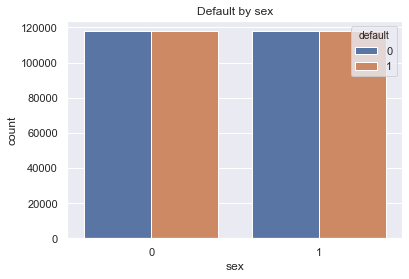

In [17]:
#looking at target by gender
ax = sns.countplot(x="sex", hue= "default", data= df_train)
ax.set_title("Default by sex")
ax

In [18]:
min_distr = df_train.groupby(["sex", "default"])["sex"].count()
min_distr

sex  default
0    0          117795
     1          117801
1    0          117846
     1          117694
Name: sex, dtype: int64

Even distribution of gender in dataset 

### Minorities

We observe a clearly uneven distribution in the defaults among minorities

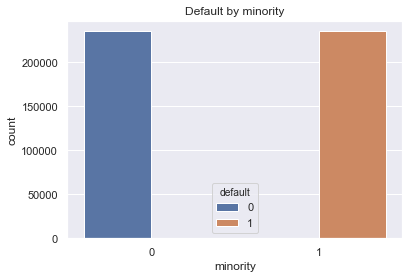

In [19]:
#looking at target by minority
ax = sns.countplot(x="minority", hue= "default", data= df_train)
ax.set_title("Default by minority")
ax

Almost all defaults are from minority clients

In [20]:
min_distr = df_train.groupby(["minority", "default"])["minority"].count()
min_distr

minority  default
0         0          235391
          1             341
1         0             250
          1          235154
Name: minority, dtype: int64

In [21]:
min_distr[0]

default
0    235391
1       341
Name: minority, dtype: int64

## Correlation between features

Observations:
    1. Minority perfecty correlated with defaulting
    2. Rent closely correlated with defaulting
    2. Job security negatively correlated with defaulting
    3. Income and education closely correlated
    4. Gender negatively correlated with income and education
    5. Minority negatively correlated with job security

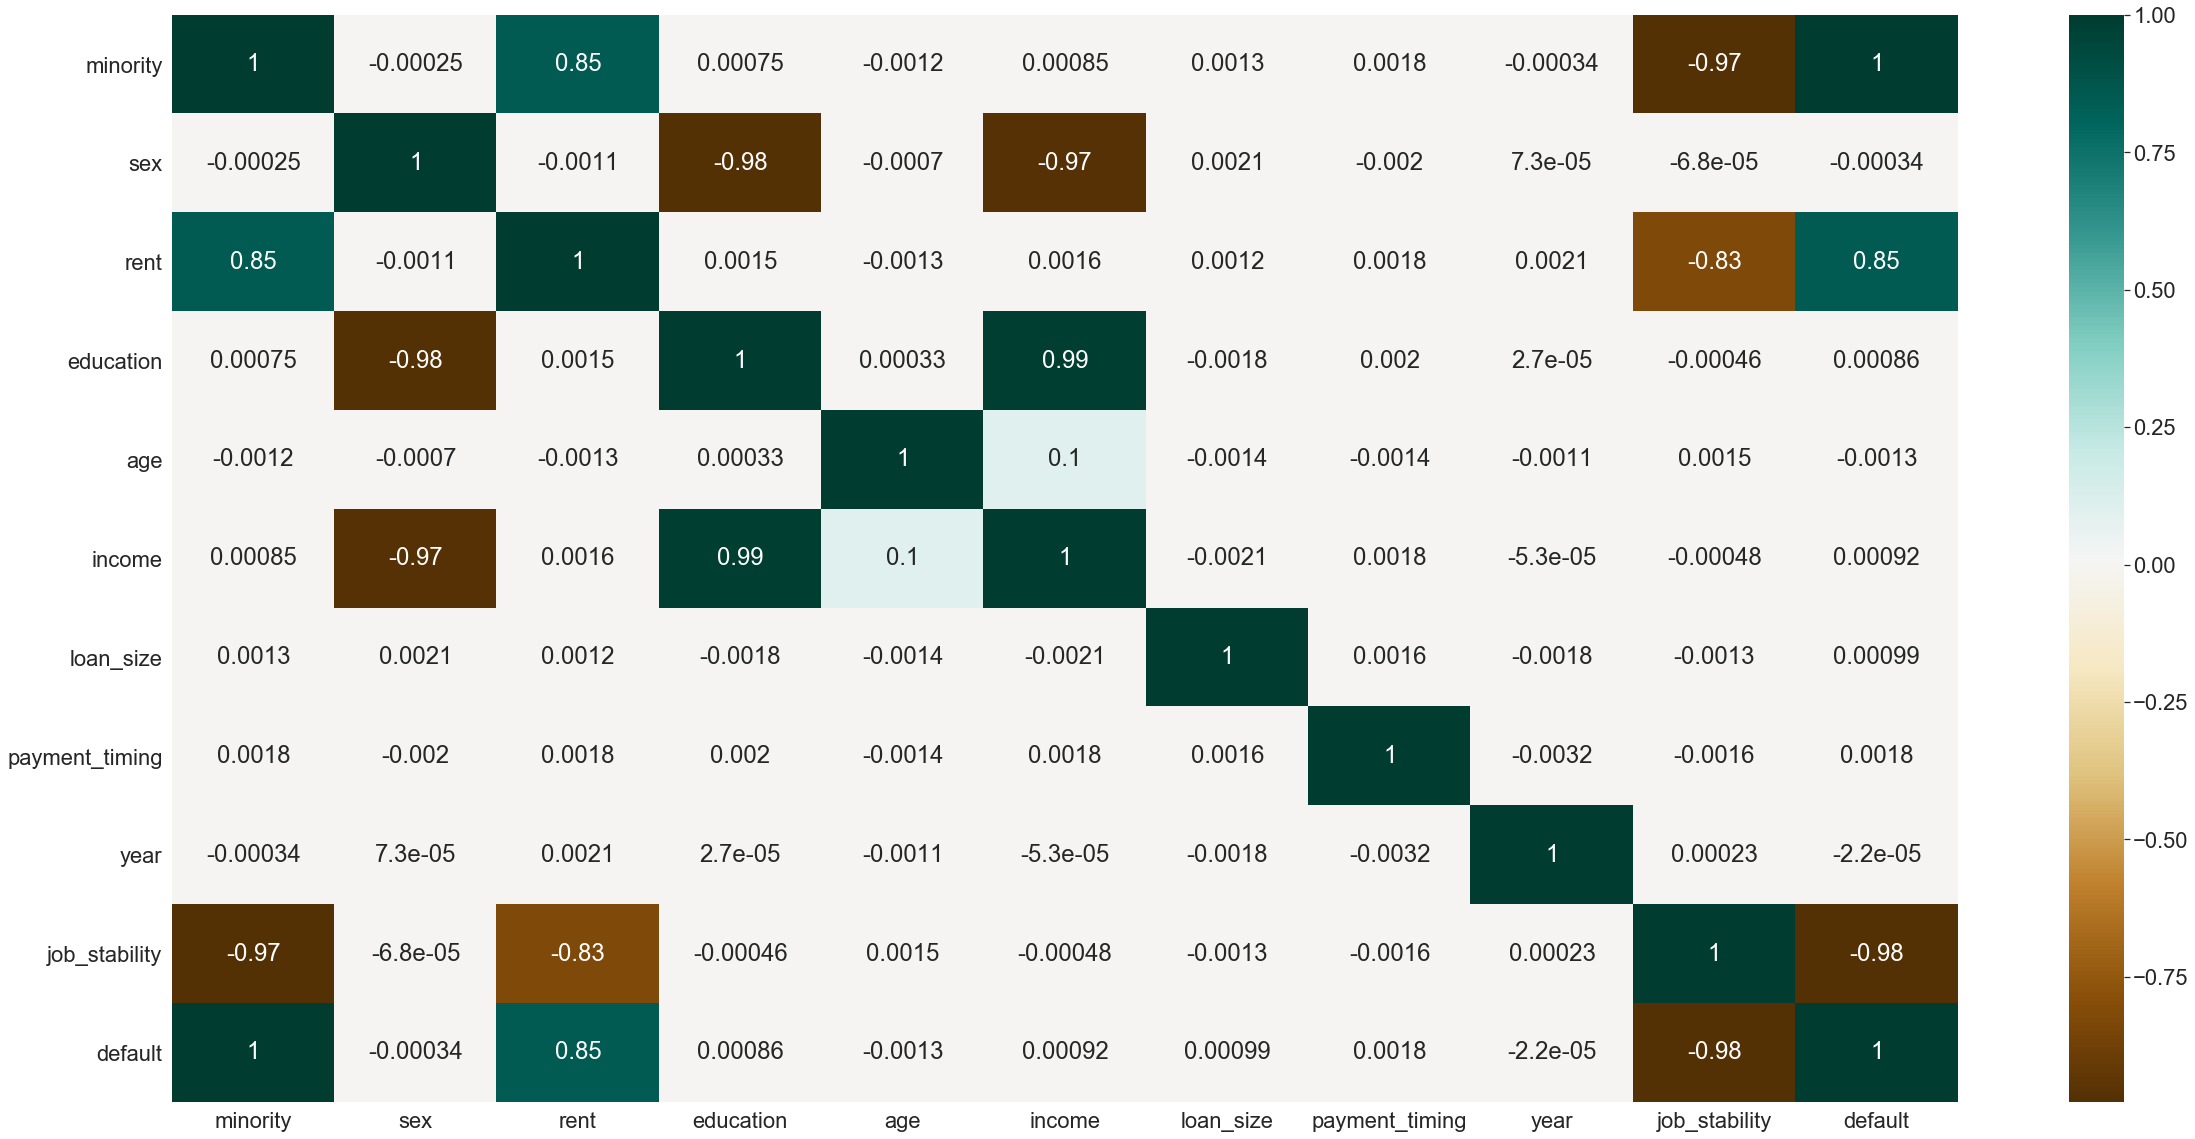

In [22]:
plt.figure(figsize=(40,20))
c= df_train.corr()
sns.set(font_scale= 2)
sns.heatmap(c,cmap="BrBG",annot=True)

## Feature importance

Using three different approaches (univariate chi, recursive elimination and tree based) to identify the most relevant features. Alternatively, we could also apply the PCA method, however, as we want to maintain explainability, we refrain from using it in this case.

The most important feature in each one of the methods is minority. Other important ones are rent, job stability and ZIP codes

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def get_dummies(df, column_name):
    print(df[column_name].unique())
    gen_features = pd.get_dummies(df[column_name],prefix = column_name, prefix_sep= '_',drop_first = True)
    df = pd.concat([df,gen_features], axis=1)
    df = df.drop([column_name], axis=1)
    return df

In [24]:
df_train = get_dummies(df_train, 'ZIP')
df_train = get_dummies(df_train, 'occupation')
df_train.head()

[MT04PA, MT15PA, MT01RA, MT12RA]
Categories (4, object): [MT04PA, MT15PA, MT01RA, MT12RA]
[MZ10CD, MZ11CD, MZ01CD]
Categories (3, object): [MZ10CD, MZ11CD, MZ01CD]


,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,ZIP_MT04PA,ZIP_MT12RA,ZIP_MT15PA,occupation_MZ10CD,occupation_MZ11CD
0,1,0,1,57.23,36.05,205168.02,7600.29,3.30,0,3.02,1,1,0,0,1,0
1,1,0,1,45.89,59.53,187530.41,5534.27,3.84,0,5.94,1,1,0,0,1,0
2,1,0,1,46.78,67.34,196912.01,2009.90,2.06,0,2.19,1,1,0,0,1,0
3,1,0,1,41.78,24.07,132911.65,3112.28,3.94,0,1.73,1,1,0,0,1,0
4,1,0,1,41.74,47.50,161162.55,1372.08,3.71,0,0.88,1,1,0,0,1,0


In [25]:
# moving target col to end
cols = list(df_train.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df_train = df_train[cols+['default']]
df_train.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,ZIP_MT04PA,ZIP_MT12RA,ZIP_MT15PA,occupation_MZ10CD,occupation_MZ11CD,default
0,1,0,1,57.23,36.05,205168.02,7600.29,3.30,0,3.02,1,0,0,1,0,1
1,1,0,1,45.89,59.53,187530.41,5534.27,3.84,0,5.94,1,0,0,1,0,1
2,1,0,1,46.78,67.34,196912.01,2009.90,2.06,0,2.19,1,0,0,1,0,1
3,1,0,1,41.78,24.07,132911.65,3112.28,3.94,0,1.73,1,0,0,1,0,1
4,1,0,1,41.74,47.50,161162.55,1372.08,3.71,0,0.88,1,0,0,1,0,1


In [26]:
#determine number of columns
len(list(df_train.columns))

16

In [27]:
#creating matrices
df_train_values = df_train.values
X = df_train_values[:,0:15]
Y = df_train_values[:,15]

In [28]:
#rescaling data for feature importance assessment
from sklearn.preprocessing import MinMaxScaler

def rescale(X):
    scaler=MinMaxScaler(feature_range=(0,1))
    rescaledX=scaler.fit_transform(X)
    return rescaledX

rescaledX = rescale(X)

In [29]:
# determining importance of features with univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

def univariate_chi(x,y,df,target_var, k=5):
    test = SelectKBest(score_func=chi2,k=k)
    fit = test.fit(x,y)
    print_bold('Univariate Scores')
    score = list(fit.scores_)
    columns = (list(df.columns.values))
    columns.remove(target_var)
    results = pd.DataFrame(columns=columns)
    results.loc[''] = score
    print(f'The {k} attributes with highest scores are: ')
    count = 1
    while count <= k:
        max_value = results.idxmax(axis=1)
        print(f'{count}: ' + max_value.values)
        results = results.drop(columns = max_value.values)
        count += 1
    print('------------')
univariate_chi(rescaledX,Y,df_train,'default')

Univariate Scores

The 5 attributes with highest scores are: 
['1: minority']
['2: rent']
['3: job_stability']
['4: ZIP_MT15PA']
['5: ZIP_MT12RA']
------------


In [30]:
# determining importance of features with recursive elimination
def recursive_elimination(x,y,df,target_var, k=5):
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(solver='liblinear')
    
    rfe = RFE(model,k)
    fit = rfe.fit(x,y)
    print_bold(f'Recursive Scores')
    columns = (list(df.columns.values))
    columns.remove(target_var)
    score = list(fit.ranking_)
    score = list(map(int, score))
    results = pd.DataFrame(columns = columns)
    results.loc[''] = score
    print(f'The {k} attributes with highest scores are: ')
    count = 1
    while count <= k:
        min_value = results.astype('float64').idxmin(axis=1)
        print(f'{count}: ' + min_value.values)
        results = results.drop(columns = min_value.values)
        count += 1
    print('------------')
    
recursive_elimination(rescaledX,Y,df_train,'default')

Recursive Scores

The 5 attributes with highest scores are: 
['1: minority']
['2: job_stability']
['3: ZIP_MT04PA']
['4: ZIP_MT15PA']
['5: occupation_MZ10CD']
------------


In [31]:
# determining importance of features with trees
def extra_trees(x,y,df,target_var,estimators=100):
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier(n_estimators=estimators)
    model.fit(x,y)
    print_bold('Feature Importance Scores')
    score = list(model.feature_importances_)
    columns = (list(df.columns.values))
    columns.remove(target_var)
    results = pd.DataFrame(columns=columns)
    results.loc[''] = score
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print(f'The importance of attributes in descending order: ')
    print()
    print(round((results.max().sort_values(ascending=False)),3)[:5])
    print('------------')
extra_trees(rescaledX,Y,df_train,'default')

Feature Importance Scores

The importance of attributes in descending order: 

minority        0.25
rent            0.19
job_stability   0.16
ZIP_MT15PA      0.14
ZIP_MT04PA      0.10
dtype: float64
------------
